# Walmart: Sales in Stormy Weather

https://www.kaggle.com/c/walmart-recruiting-sales-in-stormy-weather/

### Анализ погодных данных

Описание формата погодных данных: 
https://www.kaggle.com/c/walmart-recruiting-sales-in-stormy-weather/download/noaa_weather_qclcd_documentation.pdf

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
import matplotlib 
import matplotlib.pylab as plt
% matplotlib inline

In [3]:
matplotlib.style.available

['ggplot',
 'seaborn-dark-palette',
 'classic',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-muted',
 'dark_background',
 'seaborn-talk',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'bmh',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-deep',
 'seaborn-white',
 'seaborn-poster',
 'fivethirtyeight',
 'grayscale',
 'seaborn-notebook']

In [4]:
matplotlib.style.use('ggplot')

Загружаем погодные данные

In [45]:
#key_df =     pd.read_csv('data\\key.csv')
#train_df =   pd.read_csv('data\\train.csv')
#test_df =    pd.read_csv('data\\test.csv')
weather_df = pd.read_csv('data\\weather.csv')

In [12]:
key_df.head()

,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12


In [13]:
train_df.head()

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [14]:
test_df.head()

,date,store_nbr,item_nbr
0,2013-04-01,2,1
1,2013-04-01,2,2
2,2013-04-01,2,3
3,2013-04-01,2,4
4,2013-04-01,2,5


In [71]:
weather_df

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8
5,7,2012-01-01,50,33,42,M,26,35,23,0,-,-,,0.0,0.00,29.15,30.54,10.3,32,10.2
6,8,2012-01-01,66,45,M,M,34,46,M,M,-,-,RA BR,M,0.00,30.05,M,11.0,36,10.9
7,9,2012-01-01,34,19,27,M,17,23,38,0,-,-,UP,M,T,29.34,30.09,22.8,30,22.5
8,10,2012-01-01,73,53,63,M,55,58,2,0,0723,1738,FG+ FG BR,M,0.00,30.16,30.19,5.1,24,5.5
9,11,2012-01-01,72,48,60,7,54,56,5,0,0724,1737,FG+ FG BR,0.0,0.00,30.15,30.18,4.6,23,4.8


Конвертируем даты к формату `datetime`

In [46]:
def convert_date(str_date):
    return datetime.date(*map(int,str_date.split('-')))

convert_date('2012-01-01')

datetime.date(2012, 1, 1)

In [47]:
weather_df.date = weather_df.date.apply(convert_date)

Заполняем поля в погодных данных, содержащие нечисловые значения 'T' и 'M'

In [48]:
for col in weather_df.columns.drop(['station_nbr','date']):
    print(col.ljust(12), 
          sum(weather_df[col].apply(str).apply(str.strip)=='T'), 
          sum(weather_df[col].apply(str).apply(str.strip)=='M'), 
          sum(weather_df[col].apply(str).apply(str.strip)=='-'),
          sep='\t')

tmax        	0	906	0
tmin        	0	908	0
tavg        	0	1469	0
depart      	0	11511	0
dewpoint    	0	666	0
wetbulb     	0	1252	0
heat        	0	1469	0
cool        	0	1469	0
sunrise     	0	0	9656
sunset      	0	0	9656
codesum     	0	0	0
snowfall    	311	7224	0
preciptotal 	2410	860	0
stnpressure 	0	929	0
sealevel    	0	1724	0
resultspeed 	0	589	0
resultdir   	0	589	0
avgspeed    	0	875	0


In [49]:
for col in weather_df.columns.drop(['station_nbr','date']):
    weather_df[col][ weather_df[col].apply(str).apply(str.strip)=='T' ] = 0
    weather_df[col][ weather_df[col].apply(str).apply(str.strip)=='M' ] = np.nan

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [50]:
for col in weather_df.columns.drop(['station_nbr','date']):
    weather_df[col]=weather_df[col].astype(float, raise_on_error=False)

In [51]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20517 entries, 0 to 20516
Data columns (total 20 columns):
station_nbr    20517 non-null int64
date           20517 non-null object
tmax           19611 non-null float64
tmin           19609 non-null float64
tavg           19048 non-null float64
depart         9006 non-null float64
dewpoint       19851 non-null float64
wetbulb        19265 non-null float64
heat           19048 non-null float64
cool           19048 non-null float64
sunrise        20517 non-null object
sunset         20517 non-null object
codesum        20517 non-null object
snowfall       13293 non-null float64
preciptotal    19657 non-null float64
stnpressure    19588 non-null float64
sealevel       18793 non-null float64
resultspeed    19928 non-null float64
resultdir      19928 non-null float64
avgspeed       19642 non-null float64
dtypes: float64(15), int64(1), object(4)
memory usage: 3.0+ MB


In [52]:
weather_df.describe()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,20517.000000,19611.000000,19609.000000,19048.000000,9006.000000,19851.000000,19265.000000,19048.000000,19048.000000,13293.000000,19657.000000,19588.000000,18793.000000,19928.000000,19928.000000,19642.000000
mean,10.549057,71.621131,50.654546,61.240130,1.363091,47.270918,53.888243,9.704536,5.944666,0.043858,0.100638,29.162770,30.009160,6.468326,18.729928,7.914077
std,5.768533,19.847451,19.139055,19.194357,7.646759,19.400495,17.017772,13.843873,7.834796,0.499671,0.343747,1.245414,0.191134,4.192577,9.675662,3.933458
min,1.000000,-11.000000,-21.000000,-16.000000,-35.000000,-24.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,23.720000,29.160000,0.000000,1.000000,0.000000
25%,6.000000,59.000000,37.000000,48.000000,-3.000000,33.000000,42.000000,0.000000,0.000000,0.000000,0.000000,29.110000,29.890000,3.200000,13.000000,5.100000
50%,11.000000,76.000000,53.000000,65.000000,2.000000,51.000000,57.000000,0.000000,0.000000,0.000000,0.000000,29.410000,30.000000,5.700000,18.000000,7.300000
75%,16.000000,87.000000,67.000000,77.000000,6.000000,64.000000,68.000000,17.000000,12.000000,0.000000,0.010000,29.780000,30.130000,8.900000,26.000000,10.100000
max,20.000000,114.000000,88.000000,100.000000,33.000000,77.000000,80.000000,81.000000,35.000000,16.200000,7.360000,30.610000,30.800000,28.400000,36.000000,28.700000


Визуализируем различные погодные данные для погодной станции `station_nbr==1`

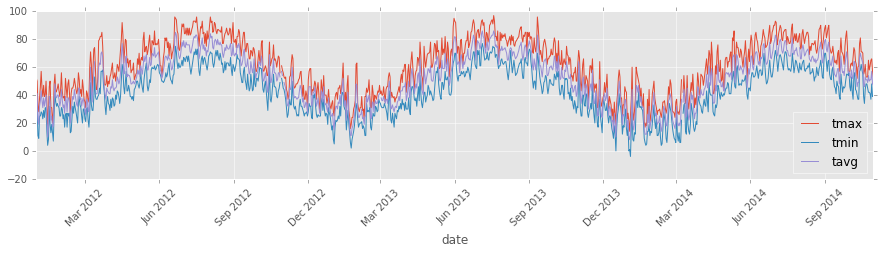

In [53]:
weather_df[weather_df.station_nbr==1].plot('date',['tmax','tmin','tavg'], figsize=(15,3))
plt.xticks(rotation=45);

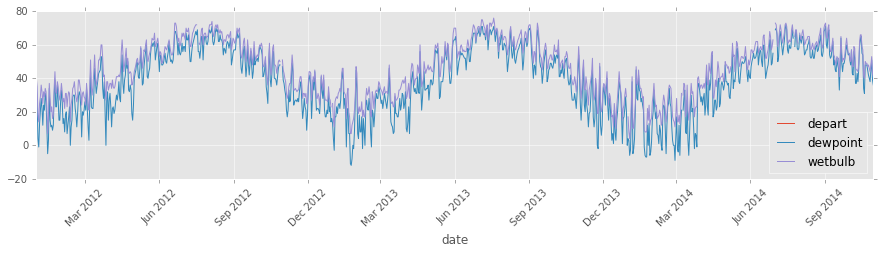

In [54]:
weather_df[weather_df.station_nbr==1].plot('date',['depart','dewpoint','wetbulb'], figsize=(15,3))
plt.xticks(rotation=45);

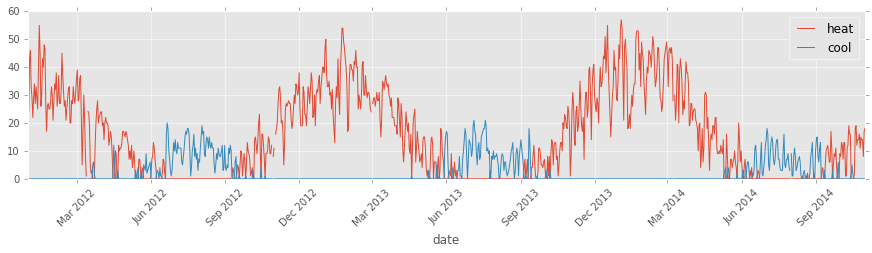

In [55]:
weather_df[weather_df.station_nbr==1].plot('date',['heat','cool'], figsize=(15,3))
plt.xticks(rotation=45);

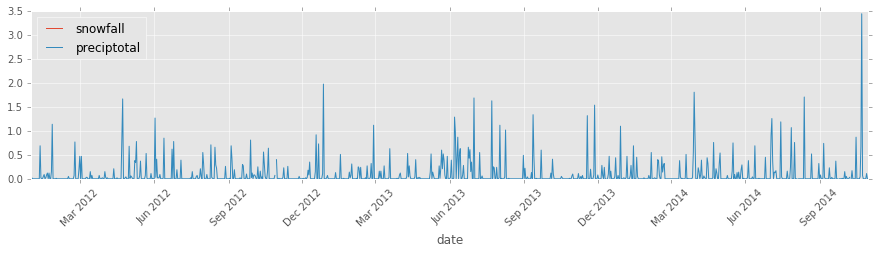

In [56]:
weather_df[weather_df.station_nbr==1].plot('date',['snowfall','preciptotal'], figsize=(15,3))
plt.xticks(rotation=45);

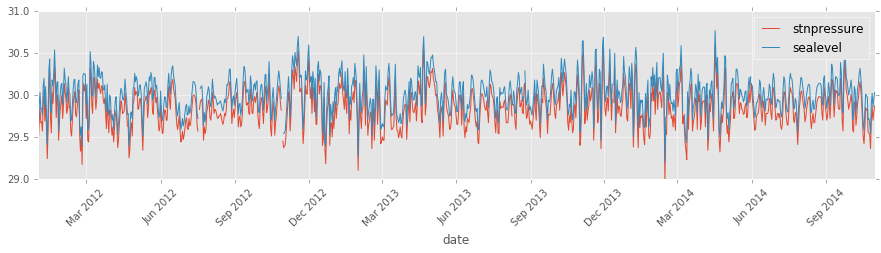

In [57]:
weather_df[weather_df.station_nbr==1].plot('date',['stnpressure','sealevel'], figsize=(15,3))
plt.xticks(rotation=45)
plt.ylim([29,31]);

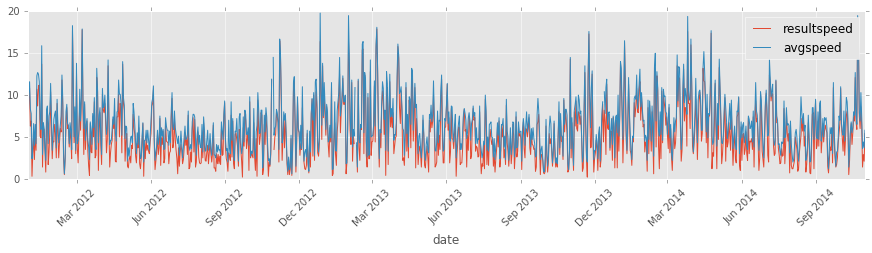

In [58]:
weather_df[weather_df.station_nbr==1].plot('date',['resultspeed','avgspeed'], figsize=(15,3))
plt.xticks(rotation=45);

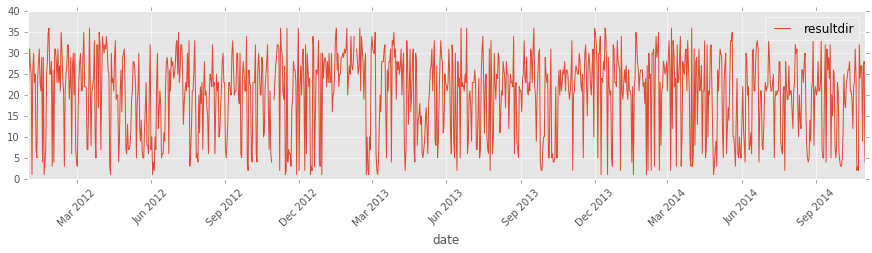

In [59]:
weather_df[weather_df.station_nbr==1].plot('date',['resultdir'], figsize=(15,3))
plt.xticks(rotation=45);

Отображаем то, как ведут себя осадки (`snowfall` и `preciptotal`) для различных погодных станций

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


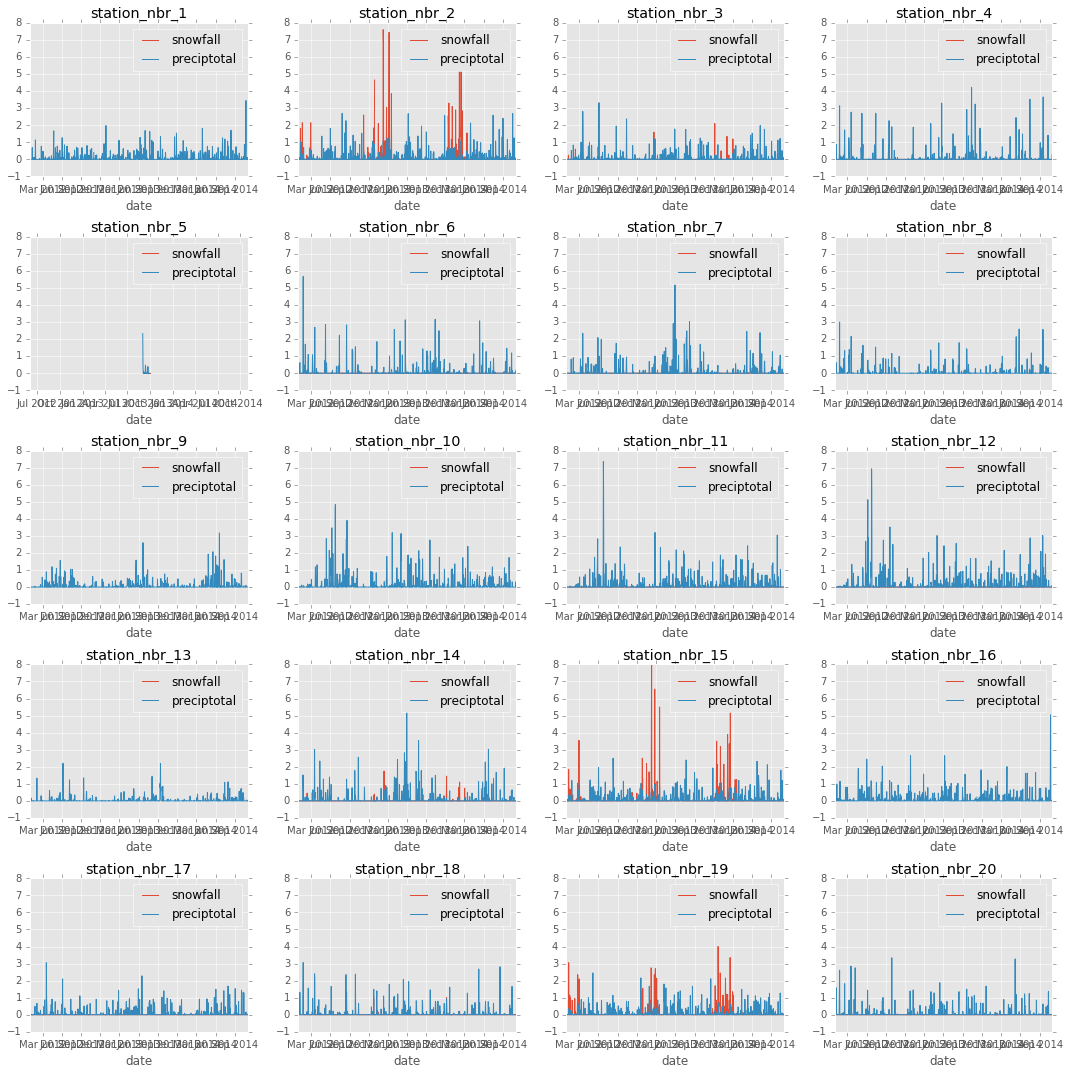

In [60]:
# уменьшаем количество снега в 2 раза для того чтобы всё отображалось в одном масштабе нормально

weather_df2 = weather_df[['date','station_nbr','snowfall','preciptotal']]
weather_df2.snowfall = weather_df2.snowfall/2.

fig,ax = plt.subplots(5,4,figsize=(15,15))

for i in np.sort(weather_df2.station_nbr.unique()):
    weather_df2[weather_df2.station_nbr==i].plot('date',['snowfall','preciptotal'],ax=ax.flatten()[i-1])
    ax.flatten()[i-1].set_title('station_nbr_'+str(i))
    ax.flatten()[i-1].set_ylim([-1,8])
    
plt.tight_layout()

Из рисунка видно, что осадки в виде снега (`snowfall`) выпадают лишь на некоторых погодных станциях.

Дождь (`preciptotal`) выпадает для всех локаций приблизительно равномерно. Иногда можно заметить в его количестве явную сезонность.

Погодная станция под номером 5, по всей видимости, не работоспособна.

Смотрим гистограммы распределения различных типов погодных факторов

In [61]:
weather_columns = np.array(weather_df.columns.drop(['station_nbr', 'date','sunrise', 'sunset', 'codesum']))
weather_columns

array(['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'], dtype=object)

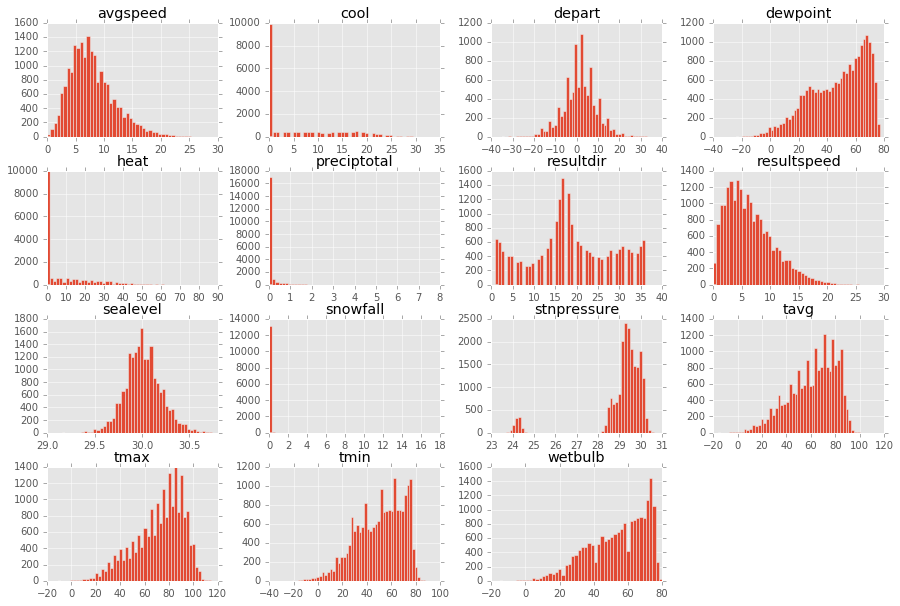

In [83]:
weather_df.hist(column=weather_columns, bins=50, figsize=(15,10));

Большая часть гистограмм выглядят достаточно равномерными. Наиболее неравномерны - гистограммы осадков (`snowfall`, `preciptotal`), а также положительной и отрицательной температуры (`heat`, `cool`). 

Гистограммы в логарифмическом масштабе по оси `x`

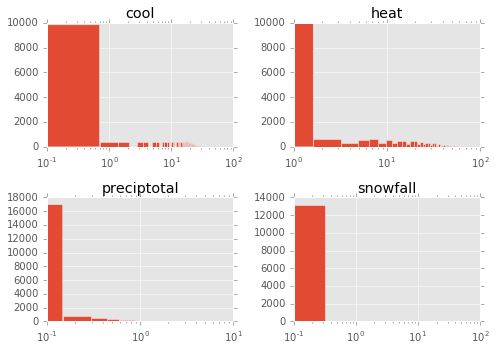

In [75]:
fig,ax = plt.subplots(2,2,figsize=(7,5))

for i,col in enumerate(['cool','heat','preciptotal','snowfall']):
    weather_df.hist(column=col, bins=50, ax=ax.flatten()[i])
    #plt.yscale('log')
    ax.flatten()[i].set_xscale('log')
    plt.title(col)

plt.tight_layout()

In [86]:
import scipy.stats
scipy.stats.boxcox(weather_df.heat.values+1)

(array([  5.82564719e+10,   8.23274571e+10,   1.87944027e+10, ...,
          5.28576805e+06,   1.58021179e+11,   1.70526717e+06]),
 8.4721358117221772)

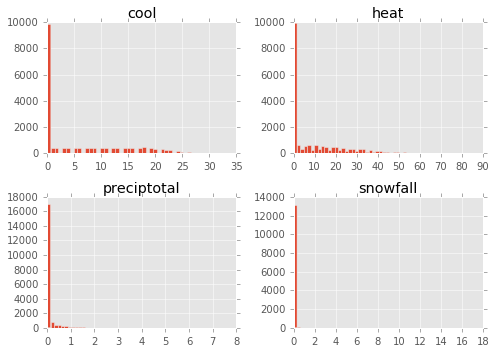

In [97]:
fig,ax = plt.subplots(2,2,figsize=(7,5))

for i,col in enumerate(['cool','heat','preciptotal','snowfall']):
    #weather_df.hist(column=col, bins=50, ax=ax.flatten()[i])
    #plt.yscale('log')
    #ax.flatten()[i].set_yscale('log')
    #boxcox,alpha = scipy.stats.boxcox(weather_df[col].values-np.min(weather_df[col].values)+1)
    ax.flatten()[i].hist(weather_df[col].dropna(),bins=50)
    ax.flatten()[i].set_title(col)
plt.tight_layout()

Делаем степенное\логарифмическое преобразование признаков, предварительно убрав нулевое значение. Смотрим получившиеся гистограммы.

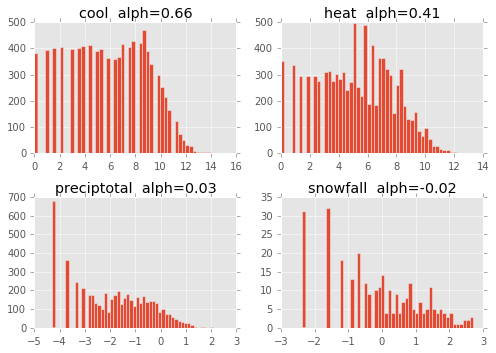

In [125]:
fig,ax = plt.subplots(2,2,figsize=(7,5))

for i,col in enumerate(['cool','heat','preciptotal','snowfall']):
    #weather_df.hist(column=col, bins=50, ax=ax.flatten()[i])
    #plt.yscale('log')
    #ax.flatten()[i].set_yscale('log')
    data_ = weather_df[col][weather_df[col]!=0].dropna()
    #transformed = (data_).apply(np.log)
    boxcox,alpha = scipy.stats.boxcox(data_)
    ax.flatten()[i].hist(boxcox,bins=50)
    ax.flatten()[i].set_title(col+"  alph="+str(np.round(alpha,2)))
    #ax.flatten()[i].set_title(col+"_tr")
plt.tight_layout()

Из рисунков можно сделать вывод, что данные признаки (погодные переменные) можно преобразовывать к достаточно равномерному виду. Для переменных 'cool' и 'heat' можно использовать степенное преобразование с показателем степени 0.5 (квадратный корень из соответствующих величин). Для переменных 'preciptotal' и 'snowfall' - логарифмическое преобразование.

Сохраняем полученный дэйтафрейм в виде сжатого csv файла

In [ ]:
# weather_df.to_csv('data\\weather_df.csv.gz', compression='gzip')